In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
duplicates=df.duplicated().any()
print(duplicates)

False


In [6]:
df.shape

(918, 12)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [8]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [9]:
print(df.describe())


              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [10]:
# encoding categorical variables using one hot encoding
data = pd.get_dummies(df, columns=['Sex','ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])



In [11]:
#checking if encoding done
data.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,False,True,False,True,...,True,False,False,True,False,True,False,False,False,True
1,49,160,180,156,1.0,1,True,False,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,98,0.0,0,False,True,False,True,...,True,False,False,False,True,True,False,False,False,True
3,48,138,214,108,1.5,1,True,False,True,False,...,True,False,False,True,False,False,True,False,True,False
4,54,150,195,122,0.0,0,False,True,False,False,...,True,False,False,True,False,True,False,False,False,True


In [12]:
# from now on we will use encoded data i.e, store in variable named "data"
#scaling (standarization)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
data[numerical_features] = scaler.fit_transform(data[numerical_features])




In [13]:
data.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,1.382928,-0.832432,0,False,True,False,True,...,True,False,False,True,False,True,False,False,False,True
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,1,True,False,False,False,...,True,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,0,False,True,False,True,...,True,False,False,False,True,True,False,False,False,True
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,1,True,False,True,False,...,True,False,False,True,False,False,True,False,True,False
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432,0,False,True,False,False,...,True,False,False,True,False,True,False,False,False,True


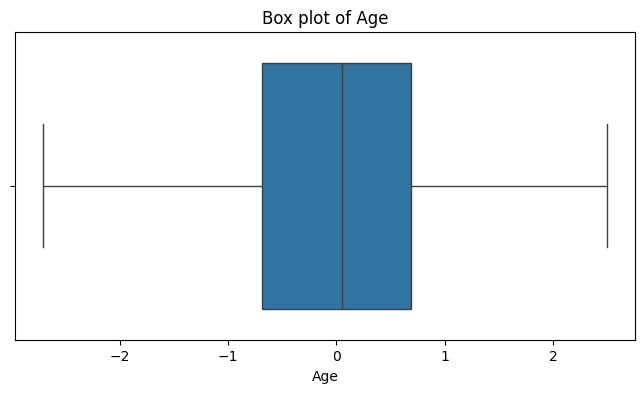

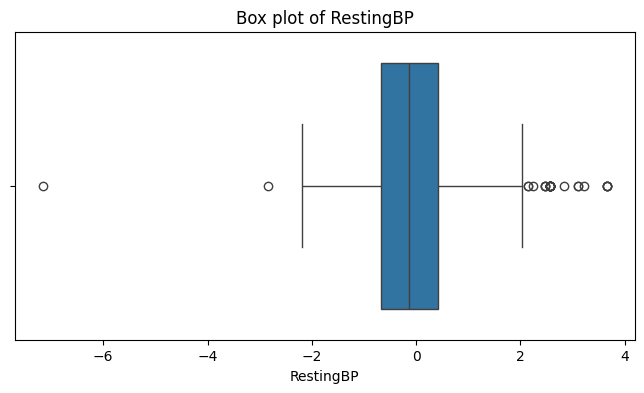

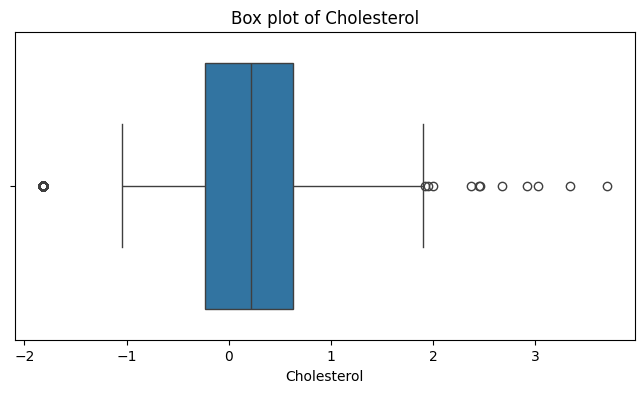

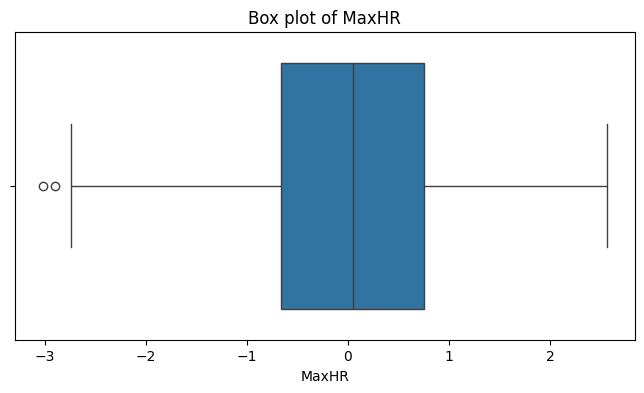

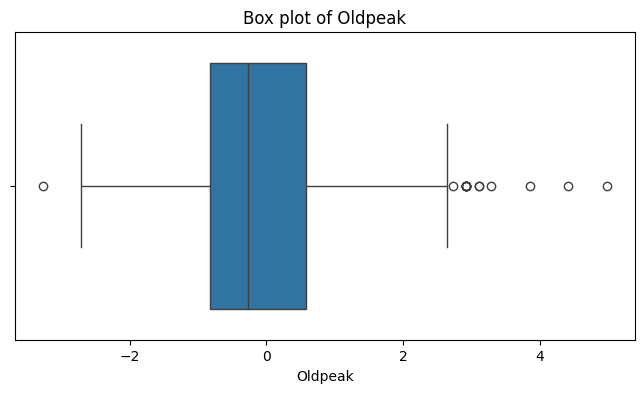

In [14]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=feature)
    plt.title(f'Box plot of {feature}')
    plt.show()


**Handling Outliers using IQR**

In [15]:
#removing outliers of box plot
# Removing outliers based on IQR
Q1 = data['RestingBP'].quantile(0.25)
Q3 = data['RestingBP'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['RestingBP'] < (Q1 - 1.5 * IQR)) | (data['RestingBP'] > (Q3 + 1.5 * IQR)))]



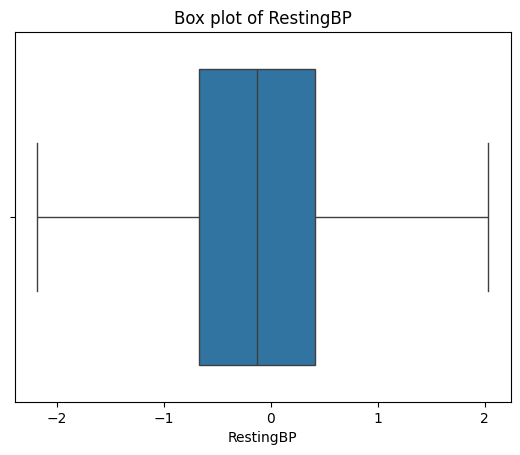

In [16]:
sns.boxplot(data=data, x='RestingBP')
plt.title('Box plot of RestingBP')
plt.show()

In [17]:
Q1 = data['Cholesterol'].quantile(0.25)
Q3 = data['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['Cholesterol'] < (Q1 - 1.5 * IQR)) | (data['Cholesterol'] > (Q3 + 1.5 * IQR)))]


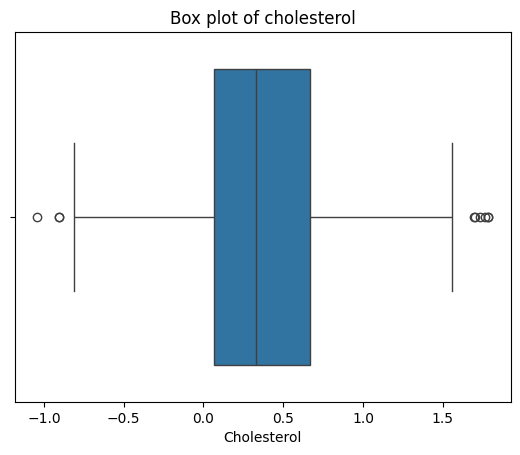

In [18]:
sns.boxplot(data=data, x='Cholesterol')
plt.title('Box plot of cholesterol')
plt.show()

In [19]:
# as ouliers of cholesterol not removed so trying again by using z score method
from scipy.stats import zscore
Q1 = data['Cholesterol'].quantile(0.25)
Q3 = data['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_iqr = Q1 - 2 * IQR
upper_bound_iqr = Q3 + 2 * IQR

# Using Z-score method
z_scores = zscore(data['Cholesterol'])
abs_z_scores = np.abs(z_scores)

# Combining IQR and Z-score methods
data = data[(abs_z_scores < 3.5) &
            (data['Cholesterol'] > lower_bound_iqr) &
            (data['Cholesterol'] < upper_bound_iqr)]


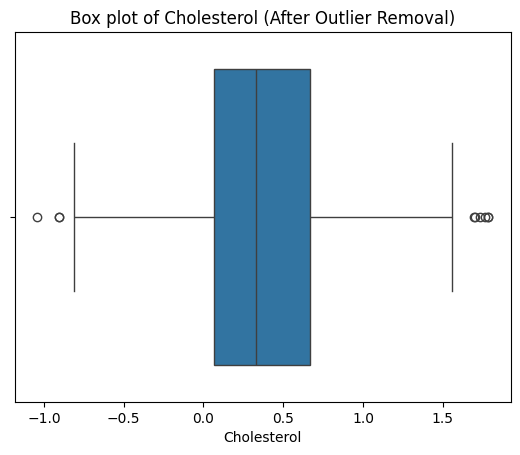

In [20]:
sns.boxplot(data=data, x='Cholesterol')
plt.title('Box plot of Cholesterol (After Outlier Removal)')
plt.show()

In [21]:
Q1 = data['MaxHR'].quantile(0.25)
Q3 = data['MaxHR'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['MaxHR'] < (Q1 - 1.5 * IQR)) | (data['MaxHR'] > (Q3 + 1.5 * IQR)))]


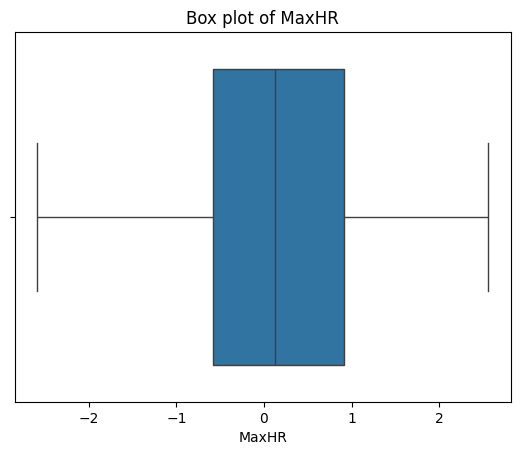

In [22]:
sns.boxplot(data=data, x='MaxHR')
plt.title('Box plot of MaxHR')
plt.show()

In [23]:
Q1 = data['Oldpeak'].quantile(0.25)
Q3 = data['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['Oldpeak'] < (Q1 - 1.5 * IQR)) | (data['Oldpeak'] > (Q3 + 1.5 * IQR)))]


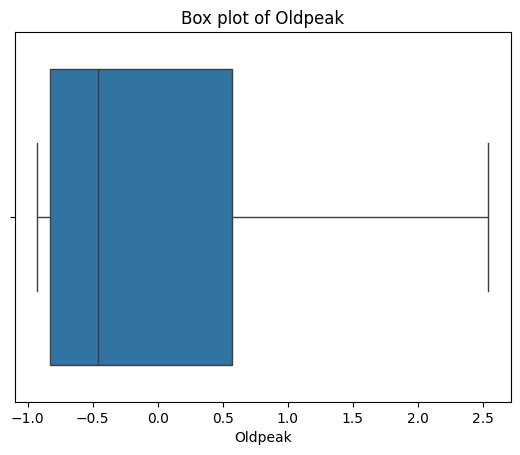

In [24]:
sns.boxplot(data=data, x='Oldpeak')
plt.title('Box plot of Oldpeak')
plt.show()

In [25]:
# DATA Splitting
X=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
y_train

175    1
747    0
432    1
555    1
117    1
      ..
75     0
113    0
288    0
635    1
108    0
Name: HeartDisease, Length: 560, dtype: int64

In [26]:
data.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,1.382928,-0.832432,0,False,True,False,True,...,True,False,False,True,False,True,False,False,False,True
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,1,True,False,False,False,...,True,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,0,False,True,False,True,...,True,False,False,False,True,True,False,False,False,True
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,1,True,False,True,False,...,True,False,False,True,False,False,True,False,True,False
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432,0,False,True,False,False,...,True,False,False,True,False,True,False,False,False,True


In [27]:
from sklearn.linear_model import LogisticRegression


In [28]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred1=log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.8936170212765957

In [30]:
# DATA Splitting
X=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
y_train

11     1
740    0
778    1
191    0
897    1
      ..
75     0
113    0
288    0
635    1
108    0
Name: HeartDisease, Length: 490, dtype: int64

In [31]:
log=LogisticRegression()
log.fit(X_train,y_train)
y_pred1=log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.8672985781990521

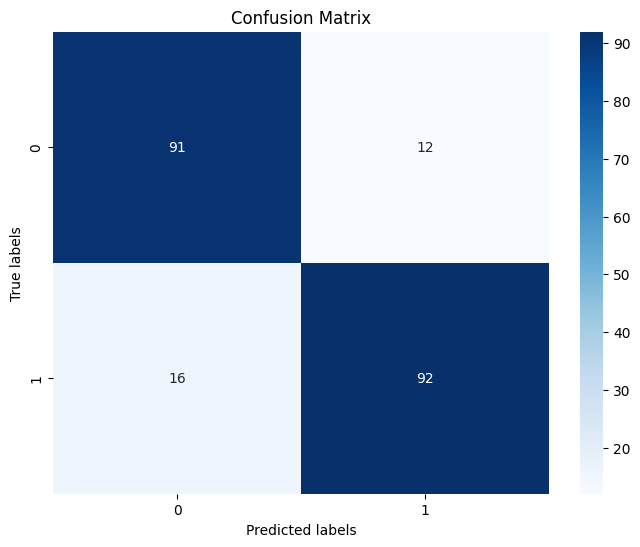

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [33]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
import tensorflow as tf

In [35]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [36]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
16/16 [==============================] - 2s 3ms/step - loss: 0.6746 - accuracy: 0.5857
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6349 - accuracy: 0.6122
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6003 - accuracy: 0.6510
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.6714
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5516 - accuracy: 0.6796
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.6939
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5103 - accuracy: 0.7163
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4916 - accuracy: 0.7388
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.7571
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4601 - accuracy: 0.7837
Epoch 11/

In [38]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)


7/7 [==============================] - 0s 3ms/step


In [39]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8720379146919431


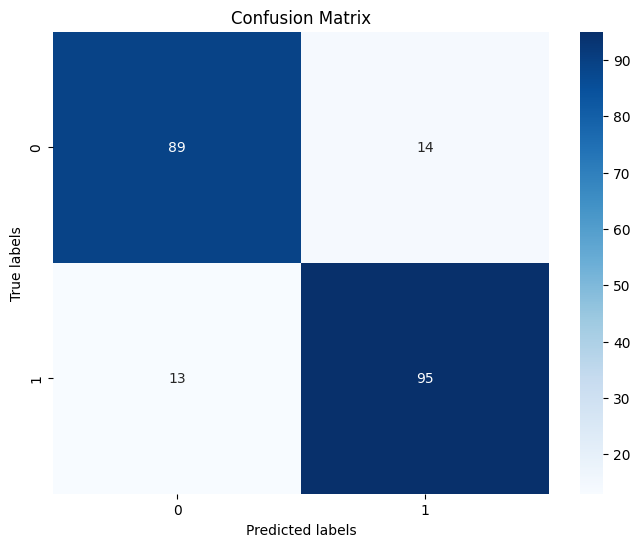

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [41]:
from sklearn.ensemble import RandomForestClassifier
Rm=RandomForestClassifier()
Rm.fit(X_train,y_train)
RandomForestClassifier()
y_pred5=Rm.predict(X_test)
accuracy_score(y_test,y_pred5)

0.8767772511848341

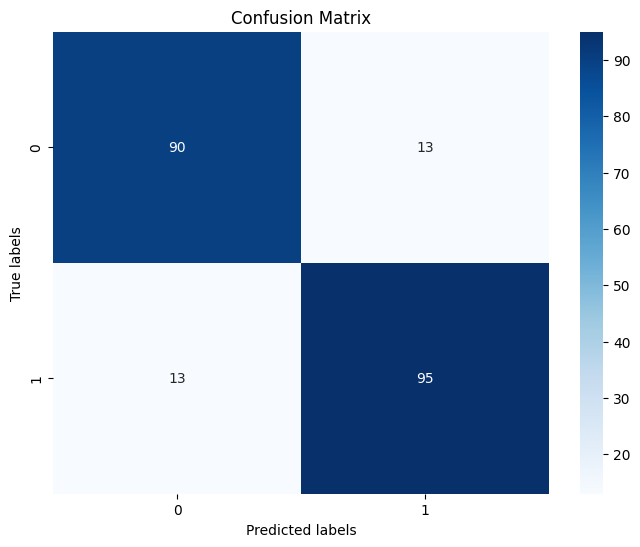

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred5)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [43]:
Final_data=pd.DataFrame({'Models':['LogisticRegression ','ann','Rm'],'ACC':[accuracy_score(y_test,y_pred1),
                                                                          accuracy_score(y_test,y_pred),
                                                                          accuracy_score(y_test,y_pred5),
                                                                         ]})

In [44]:
Final_data


,Models,ACC
0,LogisticRegression,0.867299
1,ann,0.872038
2,Rm,0.876777


<Axes: xlabel='Models', ylabel='ACC'>

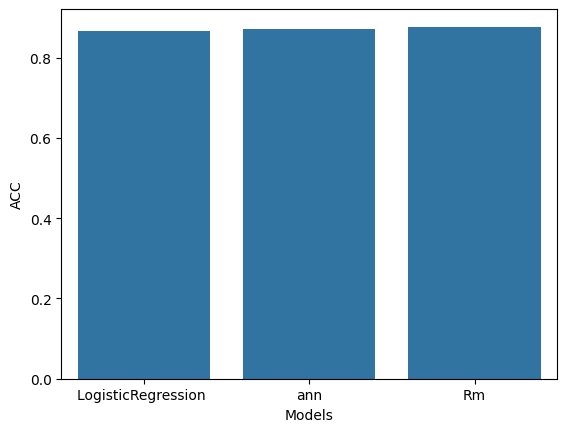

In [45]:
import seaborn as sns

sns.barplot(x='Models', y='ACC', data=Final_data)


In [46]:
X=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']
X.shape

(701, 21)

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [54]:
data.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'FastingBS_0', 'FastingBS_1',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [49]:
import pandas as pd
New_data=pd.DataFrame({'Age':52,'Sex':1,'ChestPainType':0,'RestingBP':125,'Cholesterol':212,'FastingBS':0,'RestingECG':0,'MaxHR':1,'ExerciseAngina':168,
                       'Oldpeak':1.0,'ST_Slope':2,'HeartDisease':2},index=[0])
New_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,52,1,0,125,212,0,0,1,168,1.0,2,2


In [55]:
# Assuming `data` is the original dataset used to train the model
# and it has been preprocessed with pd.get_dummies or OneHotEncoder
X_encoded = pd.get_dummies(data.drop('HeartDisease', axis=1))
y = data['HeartDisease']

# Fitting the model
rf.fit(X_encoded, y)

# Preparing New_data with the same encoding
New_data_encoded = pd.get_dummies(New_data)

# Adding missing dummy variables with 0s
missing_cols = set(X_encoded.columns) - set(New_data_encoded.columns)
for c in missing_cols:
    New_data_encoded[c] = 0

# Ensuring the order of columns matches the training data
New_data_encoded = New_data_encoded[X_encoded.columns]


In [56]:
p = rf.predict(New_data_encoded)
print(p)

[0]
